In [5]:
pip install msprime simuPOP biopython numpy pandas matplotlib seaborn

  Using cached msprime-1.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.6 kB)
  Using cached simuPOP-1.1.17.tar.gz (5.9 MB)
  Preparing metadata (setup.py) ... done
  Using cached newick-1.9.0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached tskit-0.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached demes-0.2.3-py3-none-any.whl.metadata (1.9 kB)
  Using cached svgwrite-1.4.3-py3-none-any.whl.metadata (8.8 kB)
Using cached msprime-1.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.7 MB)
Using cached demes-0.2.3-py3-none-any.whl (40 kB)
Using cached newick-1.9.0-py2.py3-none-any.whl (15 kB)
Using cached tskit-0.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
Using cached svgwrite-1.4.3-py3-none-any.whl (67 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [5 lines of output]
      Can not obtain 

In [6]:
import numpy as np

# Parametry populacji
POPULATION_SIZE = 100
GENOME_LENGTH = 1000

# Tworzymy jednorodny genom ('A' na wszystkich pozycjach)
population = ["A" * GENOME_LENGTH for _ in range(POPULATION_SIZE)]

# Wyświetlamy pierwsze 100 zasad pierwszego osobnika
print(population[0][:100])


AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


In [7]:
import random

MUTATION_RATE = 0.001  # Prawdopodobieństwo mutacji na każdą pozycję genomu
NUCLEOTIDES = ["A", "T", "C", "G"]

def introduce_mutations(genome):
    genome_list = list(genome)
    for i in range(len(genome_list)):
        if random.random() < MUTATION_RATE:
            genome_list[i] = random.choice([n for n in NUCLEOTIDES if n != genome_list[i]])
    return "".join(genome_list)

# Mutujemy całą populację
population = [introduce_mutations(genome) for genome in population]

# Wyświetlamy pierwsze 100 zasad po mutacjach
print(population[0][:100])

AAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


In [8]:
def recombine(parent1, parent2):
    crossover_point = random.randint(0, GENOME_LENGTH)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

# Tworzymy nową populację przez krzyżowanie
new_population = []
for _ in range(POPULATION_SIZE):
    parent1, parent2 = random.sample(population, 2)
    child = recombine(parent1, parent2)
    new_population.append(child)

population = new_population

In [9]:
NUM_GENERATIONS = 100  # Liczba pokoleń

for generation in range(NUM_GENERATIONS):
    population = [introduce_mutations(genome) for genome in population]  # Mutacje
    new_population = []
    
    for _ in range(POPULATION_SIZE):
        parent1, parent2 = random.sample(population, 2)
        child = recombine(parent1, parent2)
        new_population.append(child)
    
    population = new_population

    if generation % 10 == 0:
        print(f"Generacja {generation} - przykładowy genom: {population[0][:50]}")

Generacja 0 - przykładowy genom: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Generacja 10 - przykładowy genom: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Generacja 20 - przykładowy genom: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Generacja 30 - przykładowy genom: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Generacja 40 - przykładowy genom: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATAAAAAAAAAAAAA
Generacja 50 - przykładowy genom: AAAAAAAAAAAAATAAAACACAAAAAAAAAAAGAAAAAAATAAAAAAAAA
Generacja 60 - przykładowy genom: AAAAAAAAAAAAAAGAAAAACAAAAAAAAAAAAAAAAAGAAAAAAACAAA
Generacja 70 - przykładowy genom: AAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAA
Generacja 80 - przykładowy genom: AAAAAAAAAAAAAAGAAAAACAAAAAAAAAAAATAAAAGAAAAAAAAAAA
Generacja 90 - przykładowy genom: AAAAAAAAAAAAAAGAAAAACAAAAAAAACAAAAAATAAAAAAAAAAAAA


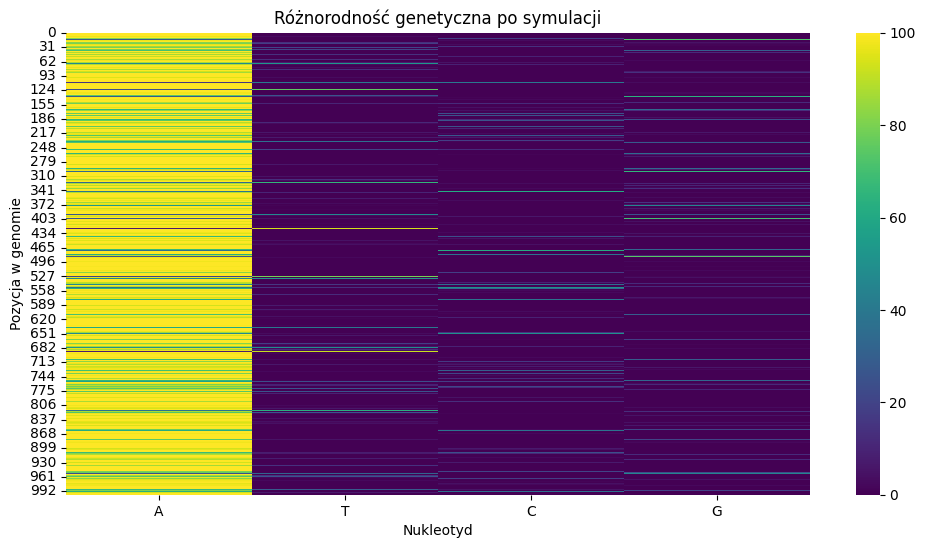

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Funkcja obliczająca częstość występowania każdej zasady w populacji
def compute_nucleotide_frequencies(population):
    positions = list(zip(*population))  # Transpozycja, aby analizować pozycje w genomie
    frequencies = [{nucleotide: positions[i].count(nucleotide) for nucleotide in NUCLEOTIDES} for i in range(GENOME_LENGTH)]
    return frequencies

# Pobieramy częstości nukleotydów
frequencies = compute_nucleotide_frequencies(population)

# Wizualizacja różnorodności genetycznej
plt.figure(figsize=(12, 6))
sns.heatmap([[freq[nuc] for nuc in NUCLEOTIDES] for freq in frequencies], cmap="viridis", xticklabels=NUCLEOTIDES)
plt.xlabel("Nukleotyd")
plt.ylabel("Pozycja w genomie")
plt.title("Różnorodność genetyczna po symulacji")
plt.show()

In [13]:
from Bio import Entrez, SeqIO

Entrez.email = "zuzanna.lubas@gmail.com"
handle = Entrez.efetch(db="nucleotide", id="NC_000852", rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")
handle.close()

print(f"Rzeczywisty genom: {record.seq[:100]}")

Rzeczywisty genom: GGGAGAACCAGGTGGGATTGACAGTGGTAAATGTGTTGACCACGAGTAAAAACAGGGCCCGGAAGCGGGGCTATATAGAAGAGCGCAAGAAGAACACATA
